## Kalman Filer Example I

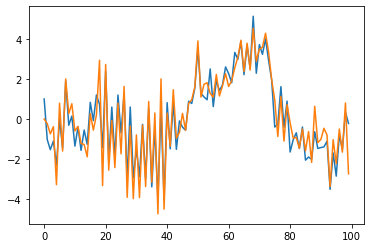

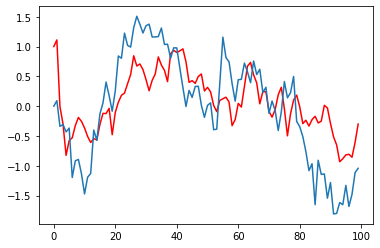

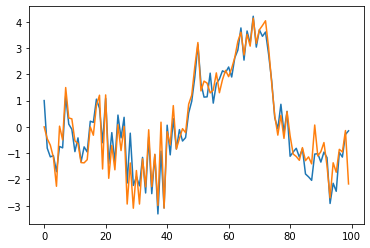

In [4]:
import numpy as np
import scipy.signal as sig
import scipy.linalg as la
import matplotlib.pyplot as plt

Aeig = np.array([0.9, 0.92, -0.8])
C = np.mat('1 1 1; 2 1 -1')

T = np.mat('1 1 2;  0 1 0; 1 1 1')
A = T*np.diag(Aeig)*la.inv(T);



# process noise 
Q = 1*np.eye(3)
# measurement noise
R = 1*np.mat('1 1; 1 2')

# Generate data for testing 
ny = 2
nx = 3
N = 100;
x = np.mat(np.zeros((nx,N)))
v = np.mat(np.zeros((ny,N)))
w = np.mat(np.zeros((nx,N)))
y = np.mat(np.zeros((ny,N)))

for k in range(N-1):
    v[:,k] = la.sqrtm(R)@np.random.randn(2,1); #  measurement noise (zero mean Gaussian with covariance R)
    w[:,k] = la.sqrtm(Q)@np.random.randn(3,1);  # process noise (zero mean Gaussian with covariance Q)
    y[:,k] = C@x[:,k] + v[:,k];  # take measurement at time k
    x[:,k+1] = A@x[:,k] +w[:,k]; # evolve state (here we don't have control input)    

# set up variables for KF
xhat = np.mat(np.zeros((nx,N)))
xPred = np.mat(np.zeros((nx,N)))
K = np.zeros((nx,ny,N))
P = np.zeros((nx,nx,N))
Ppred = np.zeros((nx,nx,N))

xhat[:,0]= np.ones((3,1)); #randomly pick one initial guess, this is different from the true state at beginning
T = np.mat(np.random.randn(3,3));
P[:,:,0] = T@T.T

for k in np.arange(1,N):
    #prediction step, first compute predicted state at k
    xPred[:,k] = A@xhat[:,k-1];
    #then update covariance matrix 
    Ppred[:,:,k] = A@P[:,:,k-1]@A.T + Q;
    #measurement update step
    # first compute Kalman gain
    K[:,:,k] = Ppred[:,:,k]@C.T@la.inv(C@Ppred[:,:,k]@C.T + R)
    # then do the update
    xhat[:,k]= xPred[:,k]  + K[:,:,k]@(y[:,k]-C@xPred[:,k]);
    P[:,:,k] = (np.eye(3) - K[:,:,k]@C)@Ppred[:,:,k];    

time = np.arange(N)
plt.plot(time, xhat[0,:].T); 
plt.plot(time, x[0,:].T)

plt.figure()
plt.plot(time, xhat[1,:].T,'r'); 
plt.plot(time, x[1,:].T)

plt.figure()
plt.plot(time, xhat[2,:].T); 
plt.plot(time, x[2,:].T)

# figure;
# plot(xhat(2,:),'--r'); 
# hold on;
# plot(x(2,:))


In [ ]:
print(P[:,:,99])